# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
arquivo = 'previsao_de_renda.csv'
leitura = pd.read_csv(arquivo)
df = pd.DataFrame(leitura)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [10]:
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [11]:
# comparando a posse de veículo com a renda

In [12]:
# comparando a quantidade de filhos 

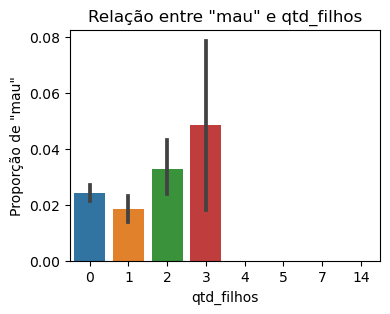

In [27]:
# Definir função para plotar gráfico de barras
def plot_relation(variable, ax):
    sns.barplot(x=variable, y='mau', data=df, estimator='mean', ax=ax)
    ax.set_title(f'Relação entre "mau" e {variable}')
    ax.set_xlabel(f'{variable}')
    ax.set_ylabel('Proporção de "mau"')

# Configurar figura e subplot para Sexo e Posse de Veículo
fig, ax = plt.subplots(figsize=(4, 3))
plot_relation('qtd_filhos', ax)
plt.show()

 - Um importante indicativo. Quanto mais filhos, mais inadimplemento. Salvo, se a pessoa não tiver filhos. A chance de pagar em dias, nesse caso, fica 1º quem tem 1 filho, 2º quem tem 0 filho, 3º quem tem 2 filhos, e 4º quem tem 3 filhos.

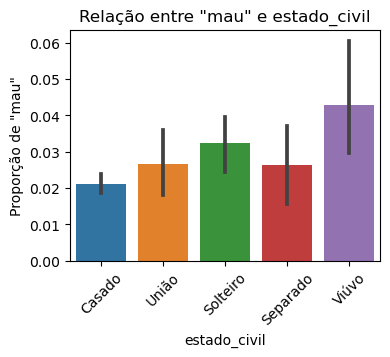

In [23]:
# Configurar figura e subplot para Estado Civil
fig, ax = plt.subplots(figsize=(4, 3))
plot_relation('estado_civil', ax)
plt.xticks(rotation=45)
plt.show()

 - Os viúvos, nessa comparação, não estão bem, pois são bem mais (proprocionalmente) maus pagadores que os outros grupos.
     - As chances de não pagar aumentam se for viúvo e tiver 3 filhos.

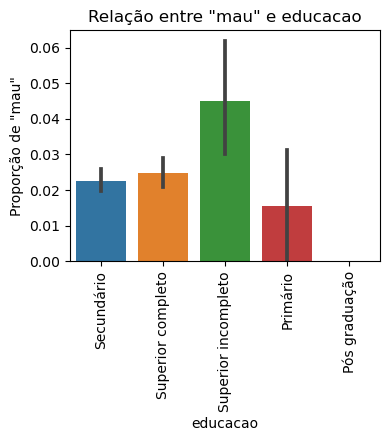

In [28]:
fig, ax = plt.subplots(figsize=(4, 3))
plot_relation('educacao', ax)
plt.xticks(rotation=90)
plt.show()

 - A proporção de quem tem superior incompleto e é mau pagador é bem maior que as outras categorias. Há, uma incontroversa relação entre as variáveis. A chance de não pagar dobra quando relacionamos com o grupo secundário. 
     - Vai se somando, e é possível calcular um índice ded chance de não pagar. O grupo até agora com mais chances de não pagar é o viúvo, com 3 filhos e superior incompleto. 

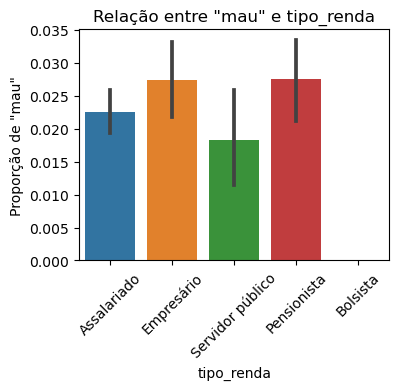

In [25]:
fig, ax = plt.subplots(figsize=(4, 3))
plot_relation('tipo_renda', ax)
plt.xticks(rotation=45)
plt.show()

 - Daqui, não podemos concluir muita coisa, pois os níveis estão bem parecidos. No entanto, o empresário e o pensionista estão piores do que os demais. 

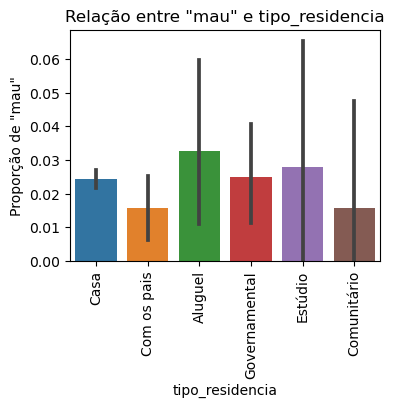

In [29]:
fig, ax = plt.subplots(figsize=(4, 3))
plot_relation('tipo_residencia', ax)
plt.xticks(rotation=90)
plt.show()

 - Aquele que paga aluguel tem mais chance de não pagar do que o que mora com os pais ou em residência comunitária. Se somarmos os fatores, temos que os grupos: 
     - viúvos,
     - com 3 filhos,
     - com superior incompleto,
     - empresário ou pensionista,
     - e cujo tipo de residência é "aluguel"
  - possuem mais chances de não pagar do que os demais.